#Analyzing United States Educational Finances

####Fetching the dataset from Kaggle using kaggle.json

In [18]:
! pip install kaggle

In [5]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d noriuk/us-educational-finances

 88% 75.0M/85.4M [00:01<00:00, 64.6MB/s]
100% 85.4M/85.4M [00:01<00:00, 50.8MB/s]


In [7]:
! unzip us-educational-finances.zip

Archive:  us-educational-finances.zip
  inflating: NDE/NDECoreExcel_Mathematics_4.Xls  
  inflating: NDE/NDECoreExcel_Mathematics_8.Xls  
  inflating: NDE/NDECoreExcel_Reading_4.Xls  
  inflating: NDE/NDECoreExcel_Reading_8.Xls  
  inflating: create_districts_csv.py  
  inflating: create_naep_csv.py      
  inflating: create_states_csv.py    
  inflating: districts.csv           
  inflating: elsect/elsect/elsec00t.xls  
  inflating: elsect/elsect/elsec01t.xls  
  inflating: elsect/elsect/elsec02t.xls  
  inflating: elsect/elsect/elsec03t.xls  
  inflating: elsect/elsect/elsec04t.xls  
  inflating: elsect/elsect/elsec05t.xls  
  inflating: elsect/elsect/elsec06t.xls  
  inflating: elsect/elsect/elsec07t.xls  
  inflating: elsect/elsect/elsec08t.xls  
  inflating: elsect/elsect/elsec09t.xls  
  inflating: elsect/elsect/elsec10t.xls  
  inflating: elsect/elsect/elsec11t.xls  
  inflating: elsect/elsect/elsec12t.xls  
  inflating: elsect/elsect/elsec13t.xls  
  inflating: elsect/elsect/el

####Importing required libraries and dataset

In [36]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
data_states = pd.read_csv("/content/states.csv")
data_states.head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,Alabama,1992,NaN,2678885,304177,1659028,715680,2653798,1481703,735036,NaN,174053
1,Alaska,1992,NaN,1049591,106780,720711,222100,972488,498362,350902,NaN,37451
2,Arizona,1992,NaN,3258079,297888,1369815,1590376,3401580,1435908,1007732,NaN,609114
3,Arkansas,1992,NaN,1711959,178571,958785,574603,1743022,964323,483488,NaN,145212
4,California,1992,NaN,26260025,2072470,16546514,7641041,27138832,14358922,8520926,NaN,2044688


####Data Processing and Exploratory Data Analysis

In [15]:
data_states.dtypes

STATE                            object
YEAR                              int64
ENROLL                          float64
TOTAL_REVENUE                     int64
FEDERAL_REVENUE                   int64
STATE_REVENUE                     int64
LOCAL_REVENUE                     int64
TOTAL_EXPENDITURE                 int64
INSTRUCTION_EXPENDITURE           int64
SUPPORT_SERVICES_EXPENDITURE      int64
OTHER_EXPENDITURE               float64
CAPITAL_OUTLAY_EXPENDITURE        int64
dtype: object

In [17]:
data_states.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
count,1275.000000,1.224000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.224000e+03,1.275000e+03
mean,2004.000000,9.175416e+05,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,4.299509e+05,9.034675e+05
std,7.213932,1.066514e+06,1.175962e+07,1.146992e+06,5.549735e+06,5.489562e+06,1.199279e+07,6.300569e+06,3.357214e+06,5.347893e+05,1.329473e+06
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,1.270800e+04
25%,1998.000000,2.645145e+05,2.189504e+06,1.899575e+05,1.165776e+06,7.151210e+05,2.170404e+06,1.171336e+06,6.380760e+05,1.034492e+05,1.815070e+05
50%,2004.000000,6.499335e+05,5.085826e+06,4.035480e+05,2.537754e+06,2.058996e+06,5.242672e+06,2.658253e+06,1.525471e+06,2.717040e+05,5.104280e+05
75%,2010.000000,1.010532e+06,1.084516e+07,8.279320e+05,5.055548e+06,4.755293e+06,1.074420e+07,5.561959e+06,3.222924e+06,5.172222e+05,9.661480e+05
max,2016.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,1.022366e+07


In [20]:
print("size of the dataset:", data_states.shape)
data_states.isnull().sum()

size of the dataset: (1275, 12)


STATE                            0
YEAR                             0
ENROLL                          51
TOTAL_REVENUE                    0
FEDERAL_REVENUE                  0
STATE_REVENUE                    0
LOCAL_REVENUE                    0
TOTAL_EXPENDITURE                0
INSTRUCTION_EXPENDITURE          0
SUPPORT_SERVICES_EXPENDITURE     0
OTHER_EXPENDITURE               51
CAPITAL_OUTLAY_EXPENDITURE       0
dtype: int64

In [21]:
data_states = data_states.fillna(data_states.median())
data_states.isnull().sum()

STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
dtype: int64

In [53]:
total_revenue = data_states['TOTAL_REVENUE'].sum()
total_expenditure = data_states['TOTAL_EXPENDITURE'].sum()
instruction_expenditure = data_states['INSTRUCTION_EXPENDITURE'].sum()

percent_revenue_instruction = (instruction_expenditure / total_revenue) * 100
percent_expenditure_instruction = (instruction_expenditure / total_expenditure) * 100

print("Total Revenue: ", total_revenue)
print("Total Expenditure: ", total_expenditure)
print("Total Instruction Expenditure: ", instruction_expenditure)
print("Percentage of Total Revenue Allocated towards Instruction: ", percent_revenue_instruction)
print("Percentage of Total Expenditure Allocated towards Instruction: ", percent_expenditure_instruction)

Total Revenue:  11605107285
Total Expenditure:  11737958705
Total Instruction Expenditure:  6079213368
Percentage of Total Revenue Allocated towards Instruction:  52.38394802138187
Percentage of Total Expenditure Allocated towards Instruction:  51.79106112726778


######Let us analyze the funding allocated by each president during their terms and also details of how much funding was allocated to each state

In [33]:
data_pr = data_states[['YEAR', 'STATE', 'TOTAL_REVENUE']]
data_p = data_pr[data_pr['YEAR'].between(1993,2016)]
data_p.head()

,YEAR,STATE,TOTAL_REVENUE
51,1993,Alabama,2827391
52,1993,Alaska,1191398
53,1993,Arizona,3427976
54,1993,Arkansas,1346909
55,1993,California,28043338


In [37]:
# data_p['PRESIDENT'] = data_p['YEAR'].apply(lambda x: 'Bill Clinton' if (x>=1993 and x<2001)  else('George W. Bush' if(x>=2001 and x<2009) else 'Barack Obama'))
# data_p.head()
PRESIDENT = []
for y in data_p['YEAR']:
  if y>=1993 and y<2001:
    PRESIDENT.append("Bill Clinton")
  elif y>=2001 and y<2009:
    PRESIDENT.append("George W. Bush")
  else:
    PRESIDENT.append("Barack Obama")

data_p['PRESIDENT'] = PRESIDENT
data_p.head()

<ipython-input-37-9e5af325550f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_p['PRESIDENT'] = PRESIDENT


,YEAR,STATE,TOTAL_REVENUE,PRESIDENT
51,1993,Alabama,2827391,Bill Clinton
52,1993,Alaska,1191398,Bill Clinton
53,1993,Arizona,3427976,Bill Clinton
54,1993,Arkansas,1346909,Bill Clinton
55,1993,California,28043338,Bill Clinton


In [38]:
data_grouped = data_p.groupby('PRESIDENT')['TOTAL_REVENUE'].sum().to_frame()
data_grouped

,TOTAL_REVENUE
PRESIDENT,
Barack Obama,4990273393
Bill Clinton,2444087685
George W. Bush,3937535223


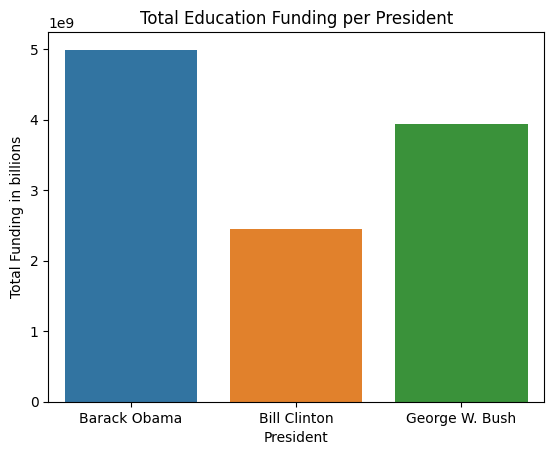

In [39]:
sns.barplot(data = data_grouped, x = data_grouped.index, y='TOTAL_REVENUE')
plt.title('Total Education Funding per President')
plt.xlabel('President')
plt.ylabel('Total Funding in billions')
plt.show()

 The data indicates notable variations in education funding among the three presidents. Barack Obama received the highest total education funding, while Bill Clinton received the lowest. Now, let's analyze how the education funding of each president compares to the overall trend in education funding during their respective terms.

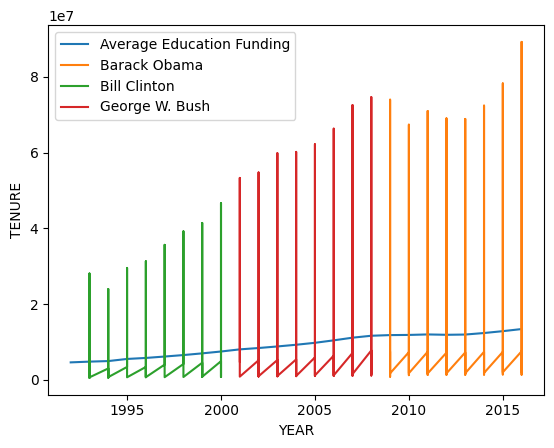

In [40]:
mean_by_year = data_states.groupby('YEAR')['TOTAL_REVENUE'].mean()
plt.plot(mean_by_year, label='Average Education Funding')

for president, group in data_p.groupby('PRESIDENT'):
    plt.plot(group['YEAR'], group['TOTAL_REVENUE'], label=president)

plt.legend()
plt.xlabel('YEAR')
plt.ylabel('TENURE')
plt.show()


In [41]:
data_RE = data_states[['TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE']]
data_RE.head()

,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE
0,2678885,304177,1659028,715680,2653798,1481703
1,1049591,106780,720711,222100,972488,498362
2,3258079,297888,1369815,1590376,3401580,1435908
3,1711959,178571,958785,574603,1743022,964323
4,26260025,2072470,16546514,7641041,27138832,14358922


<ipython-input-42-31ac7b66c24b>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_states[column], ax=ax[row][col])
<ipython-input-42-31ac7b66c24b>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_states[column], ax=ax[row][col])
<ipython-input-42-31ac7b66c24b>:8: UserWarning: 

`distplo

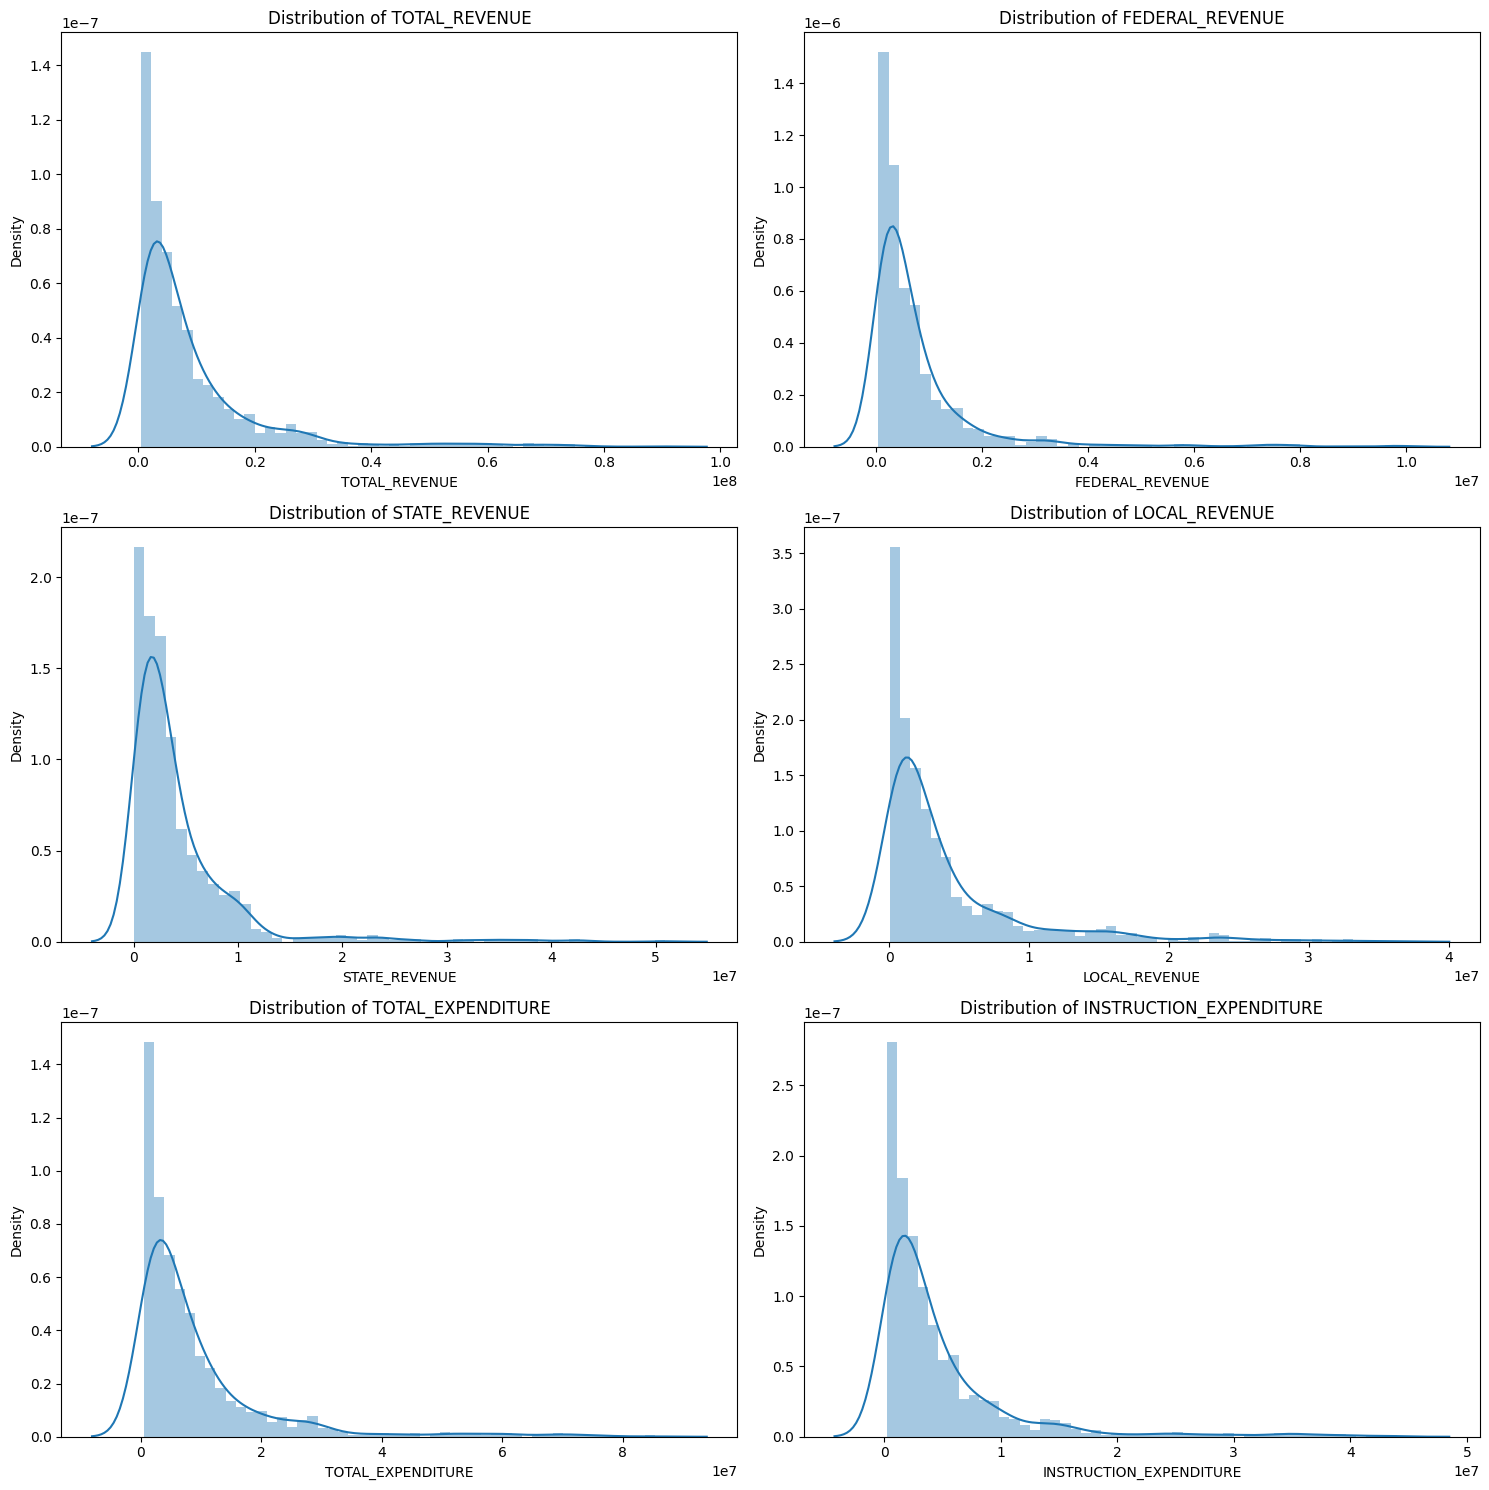

In [42]:
columns = ['TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE']

fig, ax = plt.subplots(3, 2, figsize=(15, 15))

for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    sns.distplot(data_states[column], ax=ax[row][col])
    ax[row][col].set_title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

Based on the distributions shown above, it is evident that a significant portion of the revenue and expenditure values falls within the lower ranges, while there are outliers in the higher ranges. This observation suggests a potential imbalance in the distribution of educational finances among the states.

Moving forward, our analysis will focus on examining the correlations and connections between the different revenue and expenditure columns in the dataset.

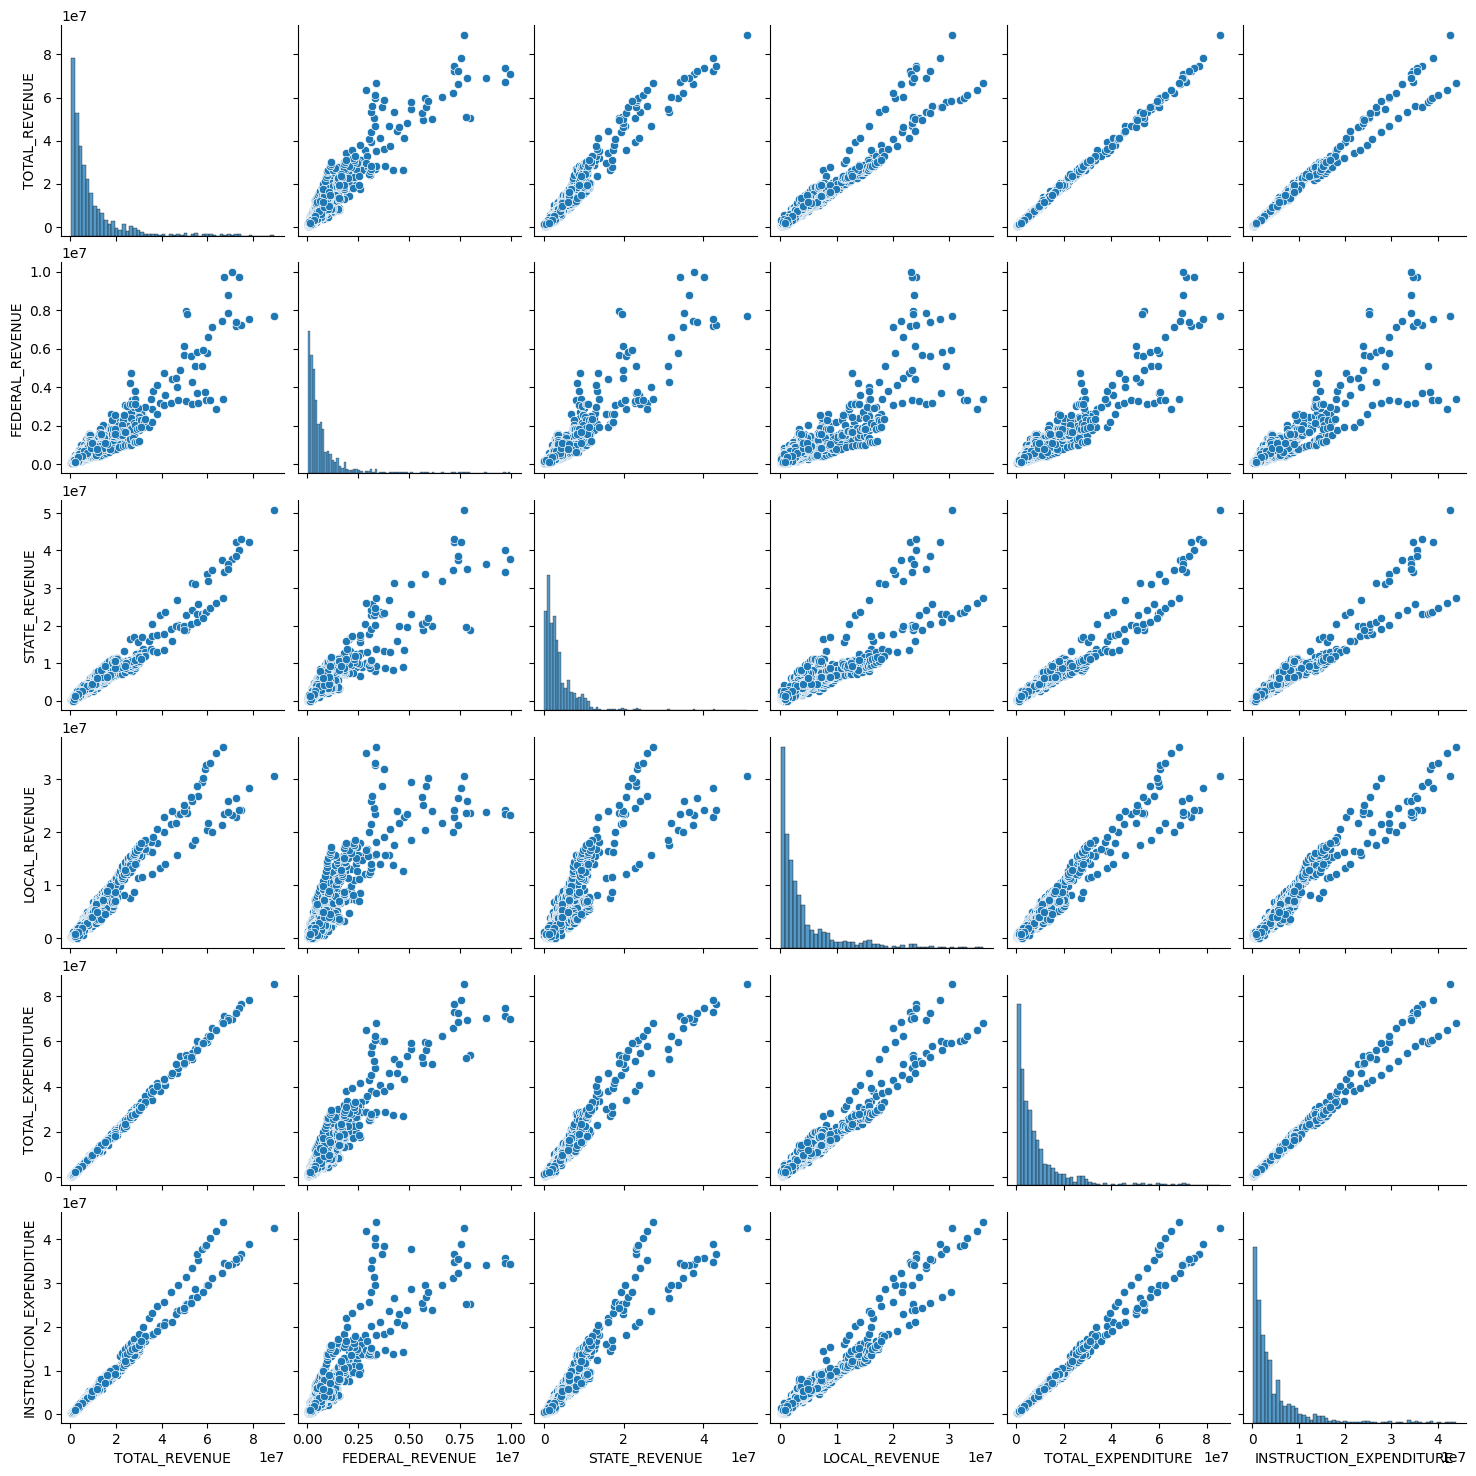

In [44]:
sns.pairplot(data_states, vars = columns)

Based on the pairplot, we can observe a notable positive correlation between TOTAL_REVENUE and TOTAL_EXPENDITURE, as well as between INSTRUCTION_EXPENDITURE and TOTAL_EXPENDITURE. This implies a strong association between the total revenue and total expenditure, indicating that a considerable portion of the expenditure is dedicated to instruction.

Moving forward, we will generate scatter plots to visually represent the connection between enrollment and each of the revenue and expenditure columns.

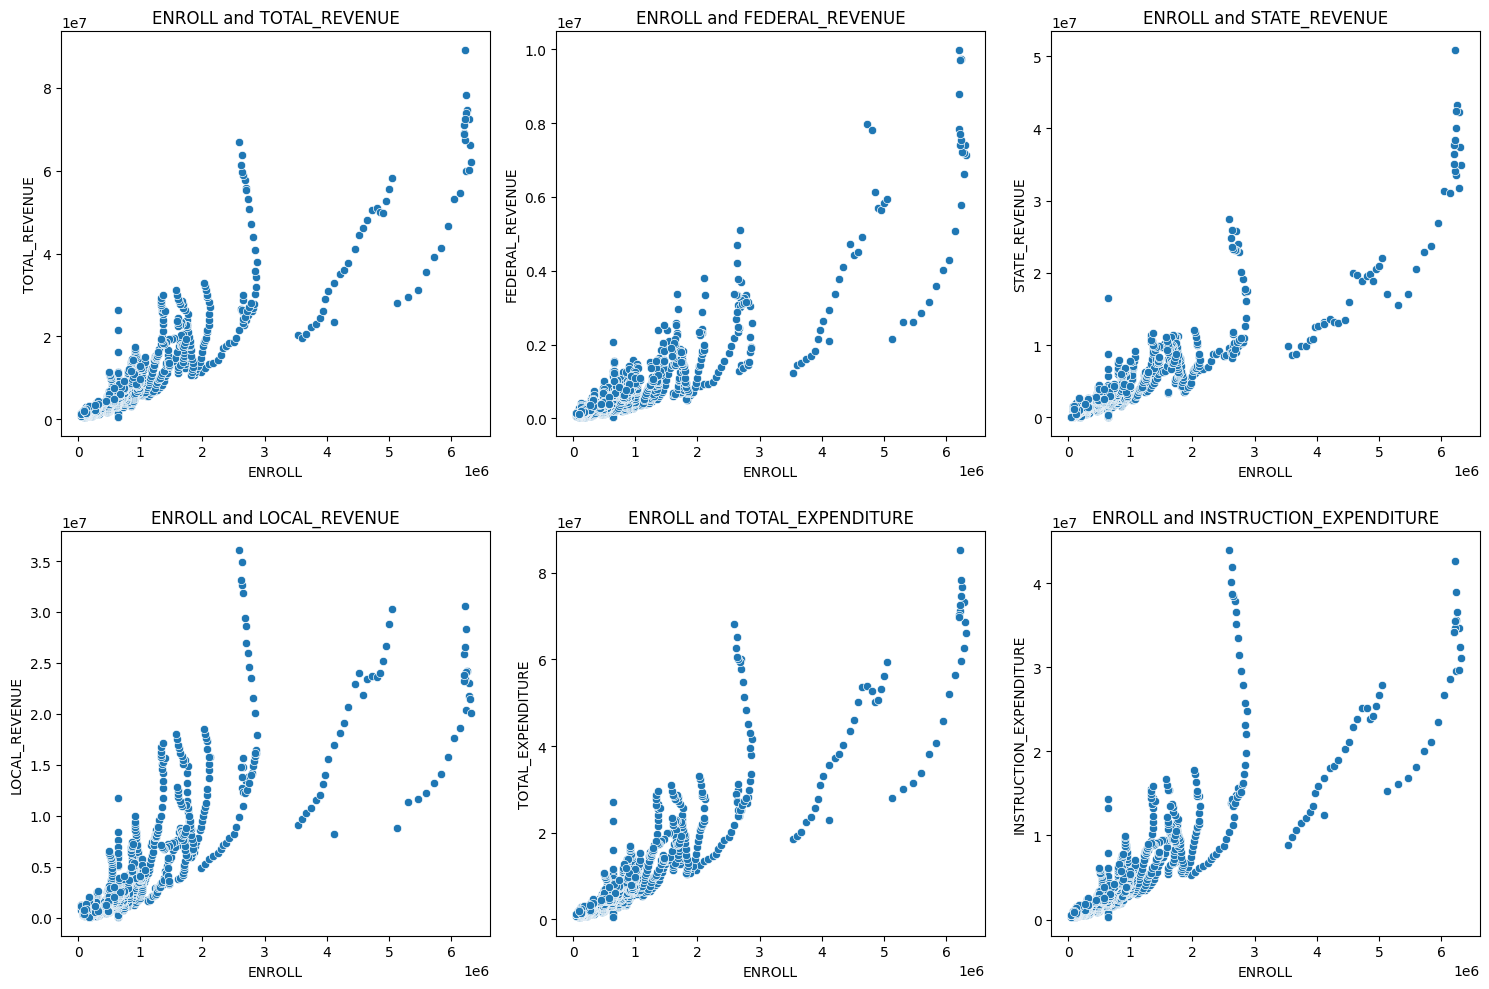

In [45]:
columns = ['TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE']

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    sns.scatterplot(x="ENROLL", y=column, data=data_states, ax=ax[row][col])
    ax[row][col].set_title(f"ENROLL and {column}")

plt.tight_layout()
plt.show()

Based on the scatter plots shown above, it is apparent that there exists a positive correlation between enrollment and each of the revenue and expenditure columns. This suggests that higher levels of funding may contribute to increased enrollment in educational institutions.

Moving forward, our analysis will employ regression analysis to quantify the strength of the relationship between enrollment and each of the revenue and expenditure columns.

In [46]:
from sklearn.linear_model import LinearRegression

columns = ['TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE']

model = LinearRegression()

for column in columns:
    model.fit(data_states[[column]], data_states['ENROLL'])
    print(f"Relationship between ENROLL and {column}:")
    print("Coefficient:", model.coef_)
    print("Intercept:", model.intercept_)
    print()


Relationship between ENROLL and TOTAL_REVENUE:
Coefficient: [0.08099111]
Intercept: 169652.54286489554

Relationship between ENROLL and FEDERAL_REVENUE:
Coefficient: [0.81360564]
Intercept: 282167.2166018054

Relationship between ENROLL and STATE_REVENUE:
Coefficient: [0.1715753]
Intercept: 182147.2814029404

Relationship between ENROLL and LOCAL_REVENUE:
Coefficient: [0.16078618]
Intercept: 245922.1065682855

Relationship between ENROLL and TOTAL_EXPENDITURE:
Coefficient: [0.07949539]
Intercept: 174983.46807426354

Relationship between ENROLL and INSTRUCTION_EXPENDITURE:
Coefficient: [0.14565692]
Intercept: 212343.51590634394



The coefficient and intercept values obtained from the linear regression models reveal the nature of the relationship between enrollment and each revenue or expenditure column.

For total revenue, the coefficient of 0.08 indicates that for every 1 unit increase in total revenue, there is an estimated 0.08 unit increase in enrollment. This suggests that as the total revenue of educational institutions rises, there is a tendency for enrollment numbers to increase as well.

When it comes to federal revenue, the coefficient of 0.8 indicates a strong positive relationship with enrollment. This implies that a 1 unit increase in federal revenue leads to an estimated 0.8 unit increase in enrollment.

Similarly, for state revenue, the coefficient of 0.17 suggests a positive relationship with enrollment. A 1 unit increase in state revenue is associated with a projected 0.17 unit increase in enrollment.

In the case of local revenue, the coefficient of 0.16 signifies a positive relationship with enrollment. An increment of 1 unit in local revenue corresponds to an estimated 0.16 unit increase in enrollment.

Regarding total expenditure, the coefficient of 0.07 suggests a positive relationship with enrollment. A 1 unit increase in total expenditure is expected to result in a 0.07 unit increase in enrollment.

Lastly, for instruction expenditure, the coefficient of 0.14 indicates a positive relationship with enrollment. A 1 unit increase in instruction expenditure is projected to lead to a 0.14 unit increase in enrollment.

These findings demonstrate the varying degrees of influence that each revenue or expenditure column has on enrollment in educational institutions.

####To gain insights into the variations in educational finance and enrollment across different states and over time, we will group our data by state and year. By doing so, we can analyze the trends and patterns in educational finance and enrollment specific to each state and observe how they change over different years.

In [50]:
data_grouped = data_states.groupby(['STATE', 'YEAR'])[['ENROLL', 'YEAR', 'TOTAL_EXPENDITURE']].mean()
data_grouped.head()

ENROLL    YEAR  TOTAL_EXPENDITURE
STATE   YEAR                                     
Alabama 1992  649933.5  1992.0          2653798.0
        1993  727716.0  1993.0          2833433.0
        1994  730004.0  1994.0          3103266.0
        1995  727480.0  1995.0          3353363.0
        1996  735912.0  1996.0          3572283.0

array([<Axes: xlabel='YEAR'>, <Axes: xlabel='YEAR'>], dtype=object)

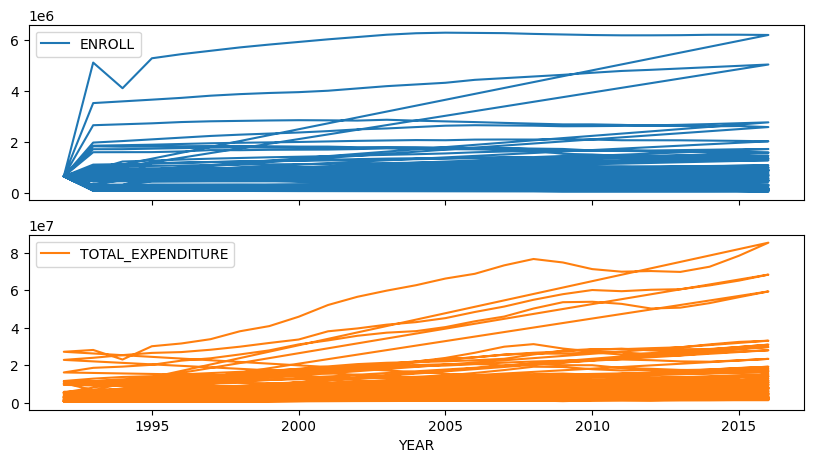

In [51]:
data_grouped.plot(x='YEAR', y=['ENROLL', 'TOTAL_EXPENDITURE'], subplots=True, figsize=(10,5))

The line plot presented illustrates the trends in enrollment and total expenditure over time for each state. This visualization enables us to detect potential disparities and shifts in educational funding and opportunities across states. By examining the patterns and trajectories of enrollment and total expenditure, we can identify any notable variations and changes in the allocation of educational resources among the states throughout the given time period.

####Now, let's conduct a comprehensive analysis of our dataset by examining the total revenue and total expenditure for each state and year. This analysis will enable us to uncover additional trends and patterns in educational finance at a more granular level. By exploring the variations in total revenue and total expenditure across states and over different years, we can gain a deeper understanding of the financial dynamics within the education sector and identify any noteworthy insights or patterns that emerge from the data.

In [55]:
grouped_data = data_states.groupby(['STATE', 'YEAR'])
grouped_data = grouped_data.agg({'TOTAL_REVENUE': 'sum', 'TOTAL_EXPENDITURE': 'sum'})
grouped_data.head()

TOTAL_REVENUE  TOTAL_EXPENDITURE
STATE   YEAR                                  
Alabama 1992        2678885            2653798
        1993        2827391            2833433
        1994        2970223            3103266
        1995        3367437            3353363
        1996        3365113            3572283

<Figure size 1000x600 with 0 Axes>

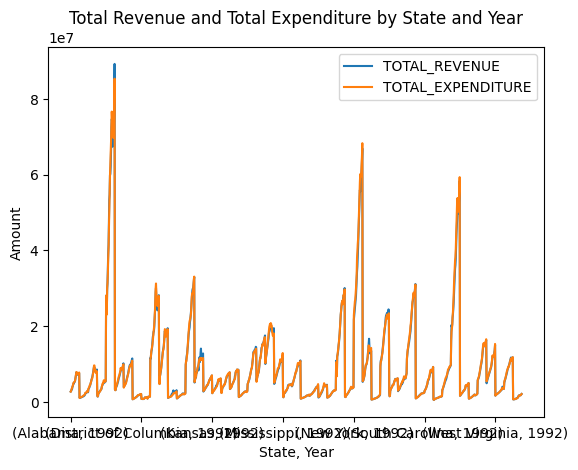

In [60]:
plt.figure(figsize=(10, 6))
grouped_data.plot()
plt.xlabel('State, Year')
plt.ylabel('Amount')
plt.title('Total Revenue and Total Expenditure by State and Year')
plt.legend()
plt.show()

In [62]:
state_totals = data_states.groupby('STATE')['TOTAL_REVENUE', 'TOTAL_EXPENDITURE'].sum()
state_totals.head()

,TOTAL_REVENUE,TOTAL_EXPENDITURE
STATE,,
Alabama,138646373,142256972
Alaska,43000991,45441660
Arizona,164436053,163742728
Arkansas,90285099,92693149
California,1394979982,1406196283


<Figure size 1000x600 with 0 Axes>

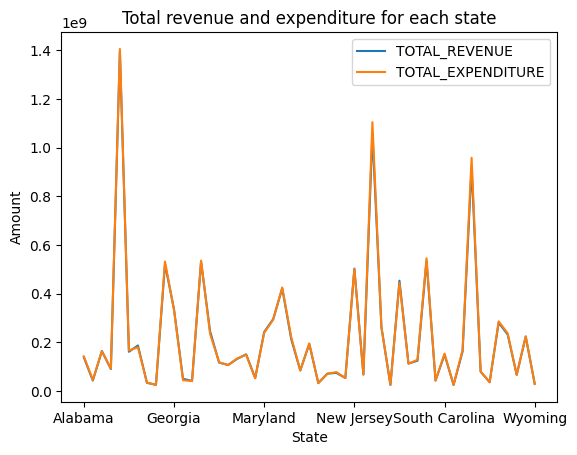

In [65]:
plt.figure(figsize=(10, 6))
state_totals.plot()
plt.xlabel('State')
plt.ylabel('Amount')
plt.title('Total revenue and expenditure for each state')
plt.legend()
plt.show()

In [64]:
year_totals = data_states.groupby('YEAR')['TOTAL_REVENUE', 'TOTAL_EXPENDITURE'].sum()
year_totals.head()

,TOTAL_REVENUE,TOTAL_EXPENDITURE
YEAR,,
1992,233210984,237333143
1993,243206654,244202408
1994,250750573,252664869
1995,279277709,281831835
1996,292952786,297740499


<Figure size 1000x600 with 0 Axes>

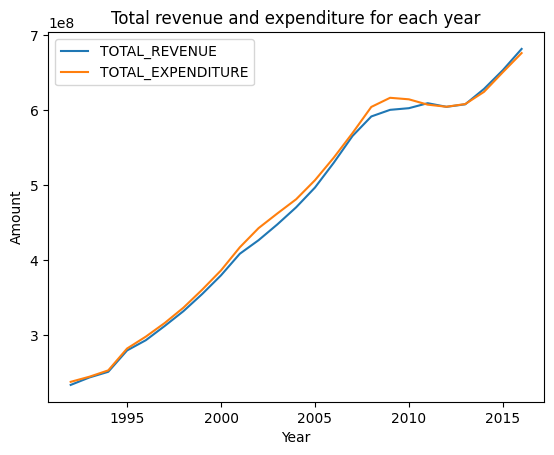

In [70]:
plt.figure(figsize=(10, 6))
year_totals.plot()
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Total revenue and expenditure for each year')
plt.legend()
plt.show()

In [69]:
grouped_dt = data_states.groupby(['STATE', 'YEAR'])
grouped_dt = grouped_dt.agg({'FEDERAL_REVENUE': 'sum', 'STATE_REVENUE': 'sum', 'LOCAL_REVENUE': 'sum'})
grouped_dt.head()

FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE
STATE   YEAR                                               
Alabama 1992           304177        1659028         715680
        1993           331409        1729295         766687
        1994           331823        1850894         787506
        1995           328957        2161366         877114
        1996           334858        2138717         891538

<Figure size 1000x600 with 0 Axes>

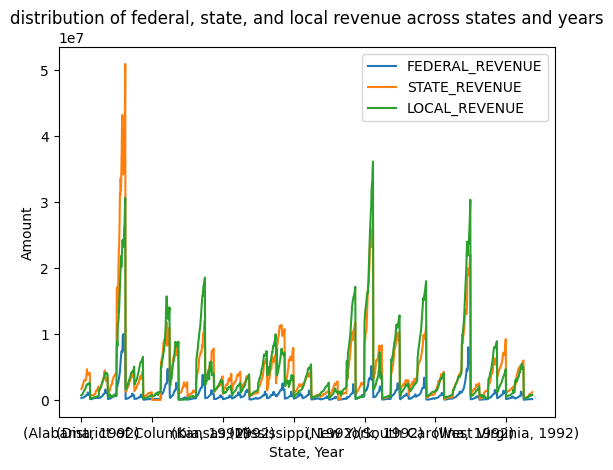

In [81]:
plt.figure(figsize=(10, 6))
grouped_dt.plot()
plt.xlabel('State, Year')
plt.ylabel('Amount')
plt.title('distribution of federal, state, and local revenue across states and years')
plt.legend()
plt.show()

In [82]:
grouped_data = data_states.groupby(['STATE', 'YEAR'])
grouped_data = grouped_data.agg({'TOTAL_REVENUE': 'sum', 'TOTAL_EXPENDITURE': 'sum', 'INSTRUCTION_EXPENDITURE': 'sum'})
grouped_data['INSTRUCTIONAL_EXPENDITURE_RATIO'] = grouped_data['INSTRUCTION_EXPENDITURE'] / grouped_data['TOTAL_REVENUE']
mean_ratios_data = grouped_data.groupby('STATE')['INSTRUCTIONAL_EXPENDITURE_RATIO'].mean()
mean_ratios_data.head()

STATE
Alabama       0.534024
Alaska        0.519717
Arizona       0.457753
Arkansas      0.532975
California    0.505926
Name: INSTRUCTIONAL_EXPENDITURE_RATIO, dtype: float64

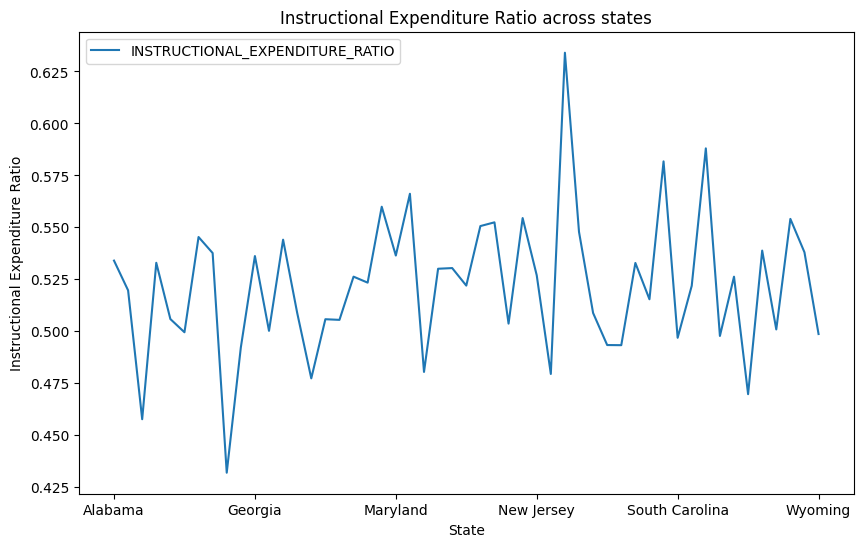

In [86]:
plt.figure(figsize=(10, 6))
mean_ratios_data.plot()
plt.xlabel('State')
plt.ylabel('Instructional Expenditure Ratio')
plt.title('Instructional Expenditure Ratio across states')
plt.legend()
plt.show()

In [85]:
grouped_data = data_states.groupby(['STATE', 'YEAR'])
grouped_data = grouped_data.agg({'TOTAL_REVENUE': 'sum', 'TOTAL_EXPENDITURE': 'sum',  'INSTRUCTION_EXPENDITURE': 'sum'})
grouped_data['INSTRUCTIONAL_EXPENDITURE_RATIO'] = grouped_data['INSTRUCTION_EXPENDITURE'] / grouped_data['TOTAL_REVENUE']
grouped_data['EXPENDITURE_TO_REVENUE_RATIO'] = grouped_data['TOTAL_EXPENDITURE'] / grouped_data['TOTAL_REVENUE']
mean_data = grouped_data.groupby('STATE').mean()
mean_data.head()

,TOTAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,INSTRUCTIONAL_EXPENDITURE_RATIO,EXPENDITURE_TO_REVENUE_RATIO
STATE,,,,,
Alabama,5545854.92,5690278.88,2937209.32,0.534024,1.024497
Alaska,1720039.64,1817666.40,892252.12,0.519717,1.057837
Arizona,6577442.12,6549709.12,3024480.36,0.457753,1.001807
Arkansas,3611403.96,3707725.96,1887682.80,0.532975,1.023164
California,55799199.28,56247851.32,27882975.88,0.505926,1.006692


<Figure size 1000x600 with 0 Axes>

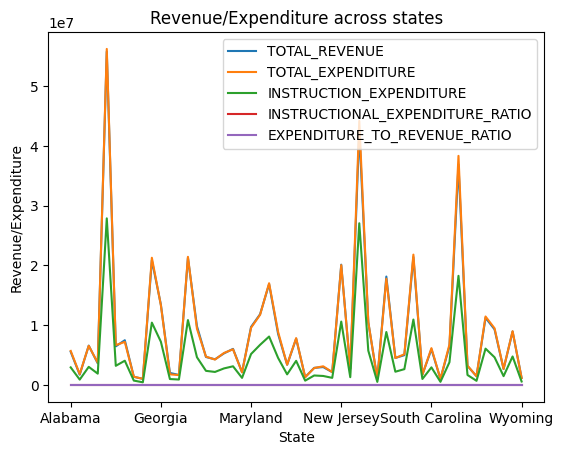

In [89]:
plt.figure(figsize=(10, 6))
mean_data.plot()
plt.xlabel('State')
plt.ylabel('Revenue/Expenditure')
plt.title('Revenue/Expenditure across states')
plt.legend()
plt.show()

In [90]:
data_grp_sy = data_states.pivot_table(index=['STATE', 'YEAR'], values=['TOTAL_REVENUE', 'TOTAL_EXPENDITURE'])
data_grp_sy.head()

TOTAL_EXPENDITURE  TOTAL_REVENUE
STATE   YEAR                                  
Alabama 1992            2653798        2678885
        1993            2833433        2827391
        1994            3103266        2970223
        1995            3353363        3367437
        1996            3572283        3365113

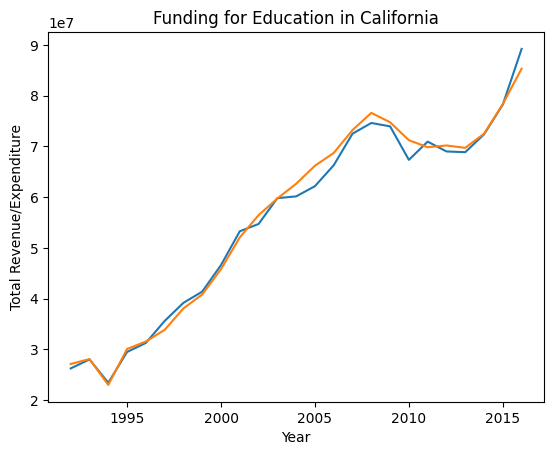

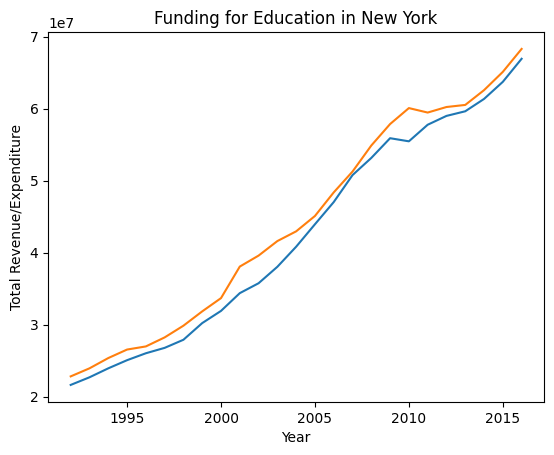

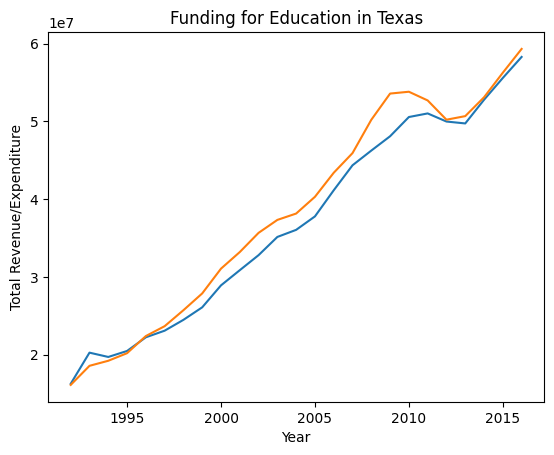

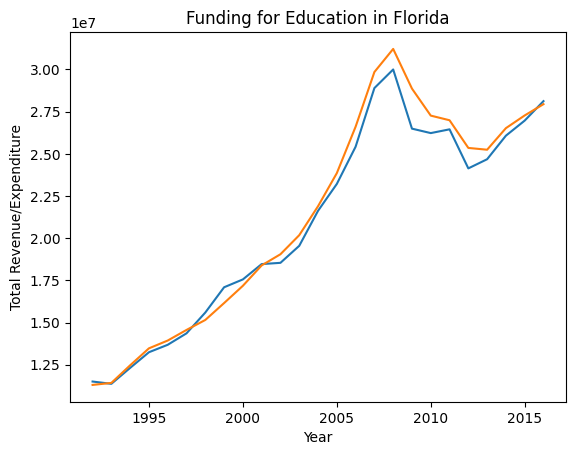

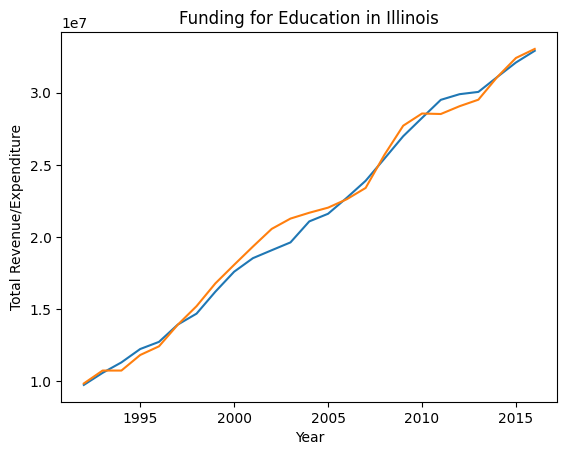

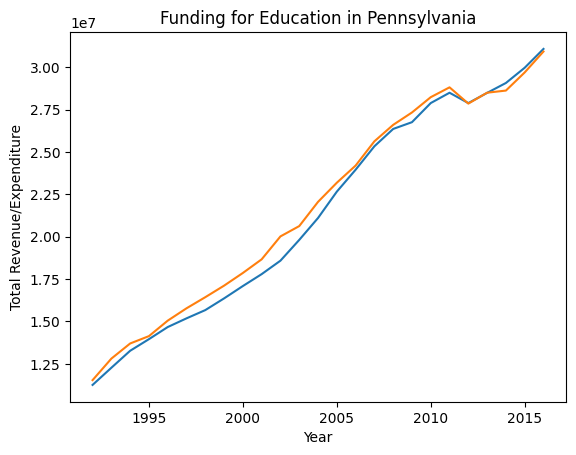

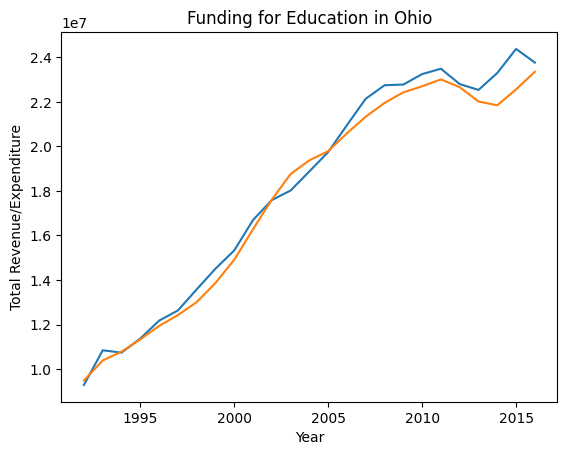

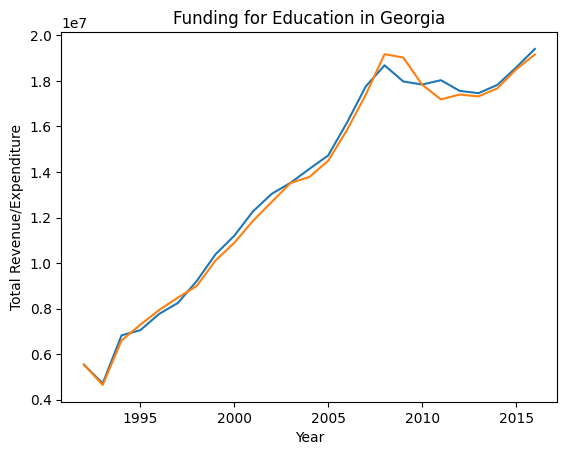

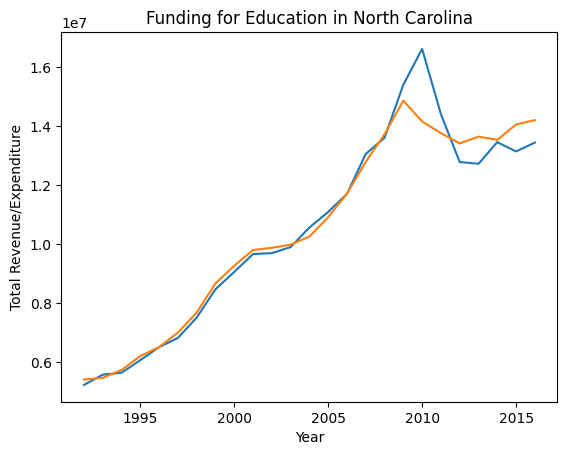

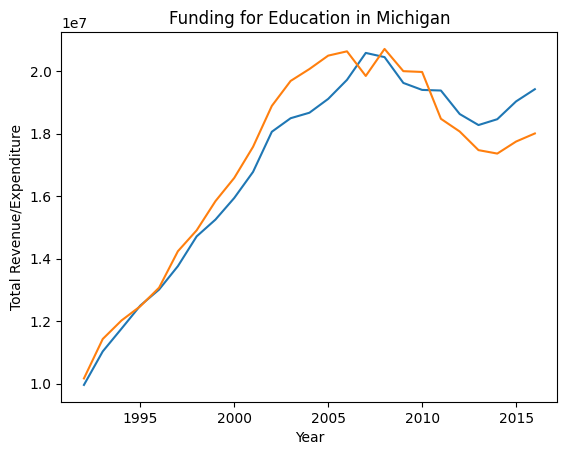

In [91]:
states = ['California', 'New York', 'Texas', 'Florida', 'Illinois', 'Pennsylvania', 'Ohio', 'Georgia', 'North Carolina', 'Michigan']

for state in states:
  state_data = data_grp_sy.loc[state]
  plt.plot(state_data['TOTAL_REVENUE'])
  plt.plot(state_data['TOTAL_EXPENDITURE'])
  plt.xlabel('Year')
  plt.ylabel('Total Revenue/Expenditure')
  plt.title(f'Funding for Education in {state}')
  plt.show()

In conclusion, our analysis has revealed a significant correlation between the total revenue and total expenditure for each state. Furthermore, we have examined the relationship between enrollment and various revenue sources such as federal, state, and local revenue across states. Additionally, we have explored how the funding for education has evolved over time and compared funding patterns among different states.

This dataset offers valuable insights into the education funding landscape in the United States. The information gleaned from this analysis can be leveraged to gain meaningful insights and inform decision-making processes within the education sector.